In [1]:
import pandas as pd
read_file1= pd.read_csv (r'C:\\Users\\revan\\Documents\\car_data\processed.cleveland.data')
read_file1.to_csv (r'C:\\Users\\revan\\Documents\\car_data\processed.cleveland.csv',index=None)
            
read_file1.rename(columns={'63.0':'age', '1.0':'sex', '1.0.1':'cp', '145.0':'trestbps', '233.0':'chol', '1.0.2':'fbs', '2.0':'restecg', '150.0':'thalach',
       '0.0':'exang', '2.3':'oldpeak', '3.0':'slope', '0.0.1':'ca', '6.0':'thal', '0':'num'})

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [1]:
# logistic regression

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import urllib.request


# Load the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Read the dataset into a pandas DataFrame
data = pd.read_csv(url, names=column_names)

# Replace '?' with NaN
data = data.replace('?', pd.NA)

# Drop rows with missing values
data = data.dropna()

# Convert relevant columns to numeric
data['ca'] = data['ca'].astype(float)
data['thal'] = data['thal'].astype(float)

# Convert target to binary (0 for no disease, 1 for disease)
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)




# Assuming y2_pred and y2test are your predicted probabilities and true labels respectively




Accuracy: 0.8666666666666667
Confusion Matrix:
[[32  4]
 [ 4 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



In [5]:
import numpy as np
from sklearn.metrics import log_loss, mean_squared_error



# Clip y_pred to avoid extreme values
y_pred_clipped = np.clip(y_pred, 1e-10, 1 - 1e-10)

# Apply logit transformation
y_pred_regression = np.log(y_pred_clipped / (1 - y_pred_clipped))

# Calculate log loss
log_loss_value = log_loss(y_test, y_pred_clipped)
print("Log Loss:", log_loss_value)

# Ensure y_test is in probability form for MSE calculation and clip values
y_test_clipped = np.clip(y_test, 1e-10, 1 - 1e-10)

# Apply logit transformation to clipped y_test
y_test_regression = np.log(y_test_clipped / (1 - y_test_clipped))

# Calculate MSE
mse = mean_squared_error(y_test_regression, y_pred_regression)
print("Mean Squared Error (MSE):", mse)


Log Loss: 3.0701134518960362


C:\Users\revan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\revan\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains infinity or a value too large for dtype('float64').

In [3]:
#linear regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Load the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Read the dataset into a pandas DataFrame
data = pd.read_csv(url, names=column_names)

# Replace '?' with NaN
data = data.replace('?', pd.NA)

# Drop rows with missing values
data = data.dropna()

# Convert relevant columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Initialize variables to store the best results
best_accuracy = 0
best_feature_pair = (None, None)
best_mse = None
best_r2 = None

# Iterate over all possible pairs of features
for target_feature in column_names:
    if target_feature not in ['ID', 'Diagnosis', 'target']:
        for predictor_feature in column_names:
            if predictor_feature not in ['ID', 'Diagnosis', 'target', target_feature]:
                X = data[[predictor_feature]]
                y = data[target_feature]

                # Split the data into training and testing sets
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                # Normalize the features
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                # Initialize and train the linear regression model
                model = LinearRegression()
                model.fit(X_train_scaled, y_train)

                # Make predictions on the test set
                y_pred = model.predict(X_test_scaled)

                # Evaluate the model's performance
                mse = mean_squared_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)

                # Convert continuous predictions to binary outcomes using median threshold
                median_threshold = np.median(y_train)
                y_binary_pred_from_linear = (y_pred > median_threshold).astype(int)
                y_binary_test = (y_test > median_threshold).astype(int)

                # Calculate pseudo-accuracy for linear regression
                pseudo_accuracy = accuracy_score(y_binary_test, y_binary_pred_from_linear)

                # Track the best results
                if pseudo_accuracy > best_accuracy and pseudo_accuracy < 1:  # Ensure accuracy is less than 1
                    best_accuracy = pseudo_accuracy
                    best_feature_pair = (predictor_feature, target_feature)
                    best_mse = mse
                    best_r2 = r2

# Print the best results
print(f"Best Feature Pair: {best_feature_pair}")
print(f"Best Pseudo-Accuracy: {best_accuracy}")
print(f"Best Mean Squared Error: {best_mse}")
print(f"Best R^2 Score: {best_r2}")


Best Feature Pair: ('age', 'slope')
Best Pseudo-Accuracy: 0.9166666666666666
Best Mean Squared Error: 0.40684953605792296
Best R^2 Score: 0.017667116157932372


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.pipeline import Pipeline

# Load the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Read the dataset into a pandas DataFrame
data = pd.read_csv(url, names=column_names)

# Replace '?' with NaN
data = data.replace('?', pd.NA)

# Drop rows with missing values
data = data.dropna()

# Convert relevant columns to numeric
data['ca'] = data['ca'].astype(float)
data['thal'] = data['thal'].astype(float)
data = data.apply(pd.to_numeric, errors='coerce')

# Initialize variables to store the best results
best_accuracy = 0
best_target_feature = None
best_mse = None
best_r2 = None

# Iterate over all possible target features
for target_feature in column_names:
    if target_feature not in ['ID', 'Diagnosis', 'target']:
        # Use all other features as predictors
        predictor_features = [feature for feature in column_names if feature not in ['ID', 'Diagnosis', 'target', target_feature]]
        X = data[predictor_features]
        y = data[target_feature]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Define the polynomial regression pipeline
        pipeline = Pipeline([
            ('scaler', StandardScaler()),               # Normalize the features
            ('poly', PolynomialFeatures(degree=2)),     # Polynomial feature transformation
            ('regressor', LinearRegression())           # Linear regression model
        ])

        # Train the polynomial regression model
        pipeline.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = pipeline.predict(X_test)

        # Evaluate the model's performance
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Convert continuous predictions to binary outcomes using median threshold
        median_threshold = np.median(y_train)
        y_binary_pred_from_linear = (y_pred > median_threshold).astype(int)
        y_binary_test = (y_test > median_threshold).astype(int)

        # Calculate pseudo-accuracy for polynomial regression
        pseudo_accuracy = accuracy_score(y_binary_test, y_binary_pred_from_linear)

        # Track the best results
        if pseudo_accuracy > best_accuracy and pseudo_accuracy < 1:  # Ensure accuracy is less than 1
            best_accuracy = pseudo_accuracy
            best_target_feature = target_feature
            best_mse = mse
            best_r2 = r2

# Print the best results
print(f"Best Target Feature: {best_target_feature}")
print(f"Best Pseudo-Accuracy: {best_accuracy}")
print(f"Best Mean Squared Error: {best_mse}")
print(f"Best R^2 Score: {best_r2}")


Best Target Feature: restecg
Best Pseudo-Accuracy: 0.9166666666666666
Best Mean Squared Error: 1.2572131795498231
Best R^2 Score: -0.3237693613276871


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statistics

# Load the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Read the dataset into a pandas DataFrame
data = pd.read_csv(url, names=column_names)

# Replace '?' with NaN
data = data.replace('?', pd.NA)

# Drop rows with missing values
data = data.dropna()

# Convert relevant columns to numeric
data['sex'] = pd.to_numeric(data['sex'])

# Selecting only the 'sex' feature for prediction
X = data[['age']]
y = data['chol']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Define thresholds
value_threshold = 50
percentage_threshold = 0.20

# Calculate value-based accuracy
value_accuracy = np.mean(np.abs(y_test - y_pred) <= value_threshold)
print(f'Value-based Accuracy: {value_accuracy * 100:.2f}%')

# Calculate percentage-based accuracy
percentage_accuracy = np.mean(np.abs(y_test - y_pred) / y_test <= percentage_threshold)
print(f'Percentage-based Accuracy: {percentage_accuracy * 100:.2f}%')
print(statistics.mean(y_pred))

# # Example prediction
# example_sex = 1  # Example: Female (0 for male, 1 for female)
# predicted_chol = model.predict([[example_sex]])
# print(f'Predicted cholesterol level for sex={example_sex}: {predicted_chol[0]}')


Mean Squared Error: 2350.673291570983
R^2 Score: 0.06417232945770468
Value-based Accuracy: 65.00%
Percentage-based Accuracy: 63.33%
248.0963340159506


In [9]:
#multivariable
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.pipeline import Pipeline

# Load the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Read the dataset into a pandas DataFrame
data = pd.read_csv(url, names=column_names)

# Replace '?' with NaN
data = data.replace('?', pd.NA)

# Drop rows with missing values
data = data.dropna()

# Convert relevant columns to numeric
data['ca'] = data['ca'].astype(float)
data['thal'] = data['thal'].astype(float)
data = data.apply(pd.to_numeric, errors='coerce')

# Initialize variables to store the best results
best_accuracy = 0
best_target_feature = None
best_mse = None
best_r2 = None

# Iterate over all possible target features
for target_feature in column_names:
    if target_feature not in ['ID', 'Diagnosis', 'target']:
        # Use all other features as predictors
        predictor_features = [feature for feature in column_names if feature not in ['ID', 'Diagnosis', 'target', target_feature]]
        X = data[predictor_features]
        y = data[target_feature]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Define the linear regression pipeline
        pipeline = Pipeline([
            ('scaler', StandardScaler()),               # Normalize the features
            ('regressor', LinearRegression())           # Linear regression model
        ])

        # Train the linear regression model
        pipeline.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = pipeline.predict(X_test)

        # Evaluate the model's performance
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Convert continuous predictions to binary outcomes using median threshold
        median_threshold = np.median(y_train)
        y_binary_pred_from_linear = (y_pred > median_threshold).astype(int)
        y_binary_test = (y_test > median_threshold).astype(int)

        # Calculate pseudo-accuracy for linear regression
        pseudo_accuracy = accuracy_score(y_binary_test, y_binary_pred_from_linear)

        # Track the best results
        if pseudo_accuracy > best_accuracy and pseudo_accuracy < 1:  # Ensure accuracy is less than 1
            best_accuracy = pseudo_accuracy
            best_target_feature = target_feature
            best_mse = mse
            best_r2 = r2

# Print the best results
print(f"Best Target Feature: {best_target_feature}")
print(f"Best Pseudo-Accuracy: {best_accuracy}")
print(f"Best Mean Squared Error: {best_mse}")
print(f"Best R^2 Score: {best_r2}")


Best Target Feature: slope
Best Pseudo-Accuracy: 0.8833333333333333
Best Mean Squared Error: 0.20007316834000116
Best R^2 Score: 0.5169259516941622


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Read the dataset into a pandas DataFrame
data = pd.read_csv(url, names=column_names)

# Replace '?' with NaN
data = data.replace('?', pd.NA)

# Drop rows with missing values
data = data.dropna()

# # Convert relevant columns to numeric
# data['ca'] = data['ca'].astype(float)
# data['thal'] = data['thal'].astype(float)

# Separate features and target variable (predicting 'chol')
X = data.drop('chol', axis=1)
y = data['chol']

# # Identify categorical and numerical columns
# categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
# numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# # Preprocessing for categorical data
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# # Bundle preprocessing for numerical and categorical data
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ])

# # Create and evaluate the model pipeline
# model = Pipeline(steps=[('preprocessor', preprocessor),
#                         ('regressor', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Define thresholds
value_threshold = 50
percentage_threshold = 0.20

# Calculate value-based accuracy
value_accuracy = np.mean(np.abs(y_test - y_pred) <= value_threshold)
print(f'Value-based Accuracy: {value_accuracy * 100:.2f}%')

# Calculate percentage-based accuracy
percentage_accuracy = np.mean(np.abs(y_test - y_pred) / y_test <= percentage_threshold)
print(f'Percentage-based Accuracy: {percentage_accuracy * 100:.2f}%')

Mean Squared Error: 2704.5630195065396
R^2 Score: -0.07671487971352242
Value-based Accuracy: 68.33%
Percentage-based Accuracy: 66.67%


In [15]:
#polynomial regression

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Read the dataset into a pandas DataFrame
data = pd.read_csv(url, names=column_names)

# Replace '?' with NaN
data = data.replace('?', pd.NA)

# Drop rows with missing values
data = data.dropna()

# Convert relevant columns to numeric
data['ca'] = data['ca'].astype(float)
data['thal'] = data['thal'].astype(float)

# Separate features and target variable (predicting 'chol')
X = data.drop('chol', axis=1)
y = data['chol']

# Identify categorical and numerical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the polynomial features transformer
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Create the pipeline with preprocessing and polynomial features
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', poly_features),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Define thresholds
value_threshold = 70
percentage_threshold = 0.20

# Calculate value-based accuracy
value_accuracy = np.mean(np.abs(y_test - y_pred) <= value_threshold)
print(f'Value-based Accuracy: {value_accuracy * 100:.2f}%')

# Calculate percentage-based accuracy
percentage_accuracy = np.mean(np.abs(y_test - y_pred) / y_test <= percentage_threshold)
print(f'Percentage-based Accuracy: {percentage_accuracy * 100:.2f}%')

Mean Squared Error: 6.097389925696256e+26
R^2 Score: -2.427434825168293e+23
Value-based Accuracy: 51.67%
Percentage-based Accuracy: 30.00%


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Read the dataset into a pandas DataFrame
data = pd.read_csv(url, names=column_names)

# Replace '?' with NaN
data = data.replace('?', pd.NA)

# Drop rows with missing values
data = data.dropna()

# Convert relevant columns to numeric
data['ca'] = data['ca'].astype(float)
data['thal'] = data['thal'].astype(float)

# Separate features and target variable (predicting 'chol')
X = data['Age
y = data['chol']

# Identify categorical and numerical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the polynomial features transformer
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Create the pipeline with preprocessing and polynomial features
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', poly_features),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Convert continuous predictions to binary outcomes using median threshold
median_threshold = np.median(y_train)
y_binary_pred_from_linear = (y_pred > median_threshold).astype(int)
y_binary_test = (y_test > median_threshold).astype(int)

# Calculate pseudo-accuracy for polynomial regression
pseudo_accuracy = accuracy_score(y_binary_test, y_binary_pred_from_linear)

print(f'Polynomial Regression Pseudo-Accuracy with Normalization: {pseudo_accuracy}')
print(f'Median Threshold: {median_threshold}')


KeyError: 'Age'

In [5]:
x = read_file1.iloc[:,2].values
y = read_file1.iloc[:,5].values
y
         
              
        
            
             
         
            
         
         
              
        
      

NameError: name 'read_file1' is not defined

In [77]:
from sklearn.model_selection import train_test_split
  
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.25, random_state=0)
xtrain.reshape(-1, 1)

array([[4.],
       [1.],
       [4.],
       [4.],
       [2.],
       [3.],
       [2.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [4.],
       [2.],
       [4.],
       [3.],
       [4.],
       [3.],
       [2.],
       [4.],
       [2.],
       [4.],
       [4.],
       [3.],
       [4.],
       [4.],
       [2.],
       [4.],
       [3.],
       [1.],
       [4.],
       [4.],
       [3.],
       [4.],
       [3.],
       [2.],
       [3.],
       [3.],
       [4.],
       [3.],
       [2.],
       [2.],
       [1.],
       [4.],
       [3.],
       [2.],
       [2.],
       [4.],
       [2.],
       [1.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [2.],
       [4.],
       [3.],
       [4.],
       [4.],
       [2.],
       [3.],
       [4.],
       [4.],
       [1.],
       [3.],
       [3.],
       [4.],
       [4.],
       [2.],
       [3.],
       [4.],
       [3.],
       [4.],
       [2.],

In [78]:
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain.reshape(-1, 1))
xtest = sc_x.transform(xtest.reshape(-1, 1))
  
print (xtrain[0:10, :])

[[ 0.91658798]
 [-2.30334285]
 [ 0.91658798]
 [ 0.91658798]
 [-1.23003257]
 [-0.1567223 ]
 [-1.23003257]
 [ 0.91658798]
 [ 0.91658798]
 [-1.23003257]]


In [79]:
from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [80]:
y_pred = classifier.predict(xtest)

In [81]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[69  0]
 [ 7  0]]


In [82]:
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.9078947368421053


<Axes: >

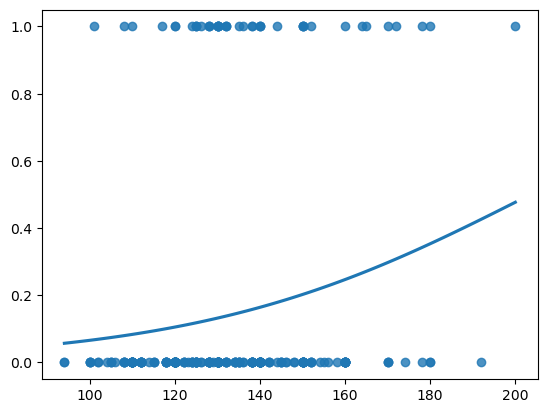

In [49]:
import seaborn as sns

sns.regplot(x=x, y=y, data=read_file1, logistic=True, ci=None)


In [69]:
x1 = read_file1.iloc[:,[2,3,4,6]].values
y1 = read_file1.iloc[:,5].values
x1

array([[  4., 160., 286.,   2.],
       [  4., 120., 229.,   2.],
       [  3., 130., 250.,   0.],
       ...,
       [  4., 130., 131.,   0.],
       [  2., 130., 236.,   2.],
       [  3., 138., 175.,   0.]])

In [70]:
from sklearn.model_selection import train_test_split
  
x1train, x1test, y1train, y1test = train_test_split(
    x1, y1, test_size=0.25, random_state=0)
x1train

array([[  4., 145., 212.,   2.],
       [  1., 150., 240.,   0.],
       [  4., 132., 353.,   0.],
       [  4., 128., 303.,   2.],
       [  2., 132., 288.,   2.],
       [  3., 160., 201.,   0.],
       [  2., 140., 195.,   0.],
       [  4., 132., 207.,   0.],
       [  4., 144., 200.,   2.],
       [  2., 128., 208.,   2.],
       [  4., 115., 303.,   0.],
       [  4., 140., 187.,   2.],
       [  3., 140., 308.,   2.],
       [  4., 112., 149.,   0.],
       [  2., 120., 295.,   0.],
       [  4., 120., 198.,   0.],
       [  3., 128., 229.,   2.],
       [  4., 114., 318.,   1.],
       [  3., 112., 230.,   2.],
       [  2., 140., 221.,   0.],
       [  4., 125., 212.,   0.],
       [  2., 120., 240.,   0.],
       [  4., 125., 300.,   2.],
       [  4., 140., 241.,   0.],
       [  3., 120., 295.,   2.],
       [  4., 124., 266.,   2.],
       [  4., 122., 286.,   2.],
       [  2., 130., 266.,   0.],
       [  4., 128., 259.,   2.],
       [  3., 120., 209.,   0.],
       [  

In [71]:
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
x1train = sc_x.fit_transform(x1train)
x1test = sc_x.transform(x1test)
  
print (x1train)
    #feature Scaling  
# from sklearn.preprocessing import StandardScaler    
#     st_x= StandardScaler()    
#     x1train= st_x.fit_transform(x1train)    
#     x1test= st_x.transform(x1test)  



[[ 9.16587979e-01  7.73186548e-01 -6.88674386e-01  1.06407046e+00]
 [-2.30334285e+00  1.05936434e+00 -1.64947488e-01 -9.56769236e-01]
 [ 9.16587979e-01  2.91242886e-02  1.94866463e+00 -9.56769236e-01]
 [ 9.16587979e-01 -1.99817945e-01  1.01343803e+00  1.06407046e+00]
 [-1.23003257e+00  2.91242886e-02  7.32870050e-01  1.06407046e+00]
 [-1.56722297e-01  1.63171992e+00 -8.94424239e-01 -9.56769236e-01]
 [-1.23003257e+00  4.87008756e-01 -1.00665143e+00 -9.56769236e-01]
 [ 9.16587979e-01  2.91242886e-02 -7.82197046e-01 -9.56769236e-01]
 [ 9.16587979e-01  7.15950989e-01 -9.13128771e-01  1.06407046e+00]
 [-1.23003257e+00 -1.99817945e-01 -7.63492514e-01  1.06407046e+00]
 [ 9.16587979e-01 -9.43880204e-01  1.01343803e+00 -9.56769236e-01]
 [ 9.16587979e-01  4.87008756e-01 -1.15628769e+00  1.06407046e+00]
 [-1.56722297e-01  4.87008756e-01  1.10696069e+00  1.06407046e+00]
 [ 9.16587979e-01 -1.11558688e+00 -1.86705991e+00 -9.56769236e-01]
 [-1.23003257e+00 -6.57702412e-01  8.63801775e-01 -9.56769236e

In [72]:
# from sklearn.linear_model import LogisticRegression
  
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(x1train, y1train)
from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(x1train, y1train)

LogisticRegression(random_state=0)

In [73]:
y1_pred = classifier.predict(x1test)

In [74]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y1test, y1_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[69  0]
 [ 7  0]]


In [75]:
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ", accuracy_score(y1test, y1_pred))

Accuracy :  0.9078947368421053


In [60]:
read_file1.rename(columns={'63.0':'age', '1.0':'sex', '1.0.1':'cp', '145.0':'trestbps', '233.0':'chol', '1.0.2':'fbs', '2.0':'restecg', '150.0':'thalach',
       '0.0':'exang', '2.3':'oldpeak', '3.0':'slope', '0.0.1':'ca', '6.0':'thal', '0':'num'})

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [61]:
x = read_file1.iloc[:,3].values
y = read_file1.iloc[:,5].values

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Reshape X to a column vector
X = x.reshape(-1, 1)

# Degree of polynomial
degree = 2

# Transform the features to include polynomial terms up to the specified degree
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Initialize and fit a linear regression model
model = LinearRegression()
model.fit(X_poly, y)



# Predict
y_pred = model.predict(X_poly)

## Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
mse


0.1204967699301096

In [63]:
acurracy= 1-mse

In [64]:
acurracy

0.8795032300698904

In [65]:
read_file1.rename(columns={'63.0':'age', '1.0':'sex', '1.0.1':'cp', '145.0':'trestbps', '233.0':'chol', '1.0.2':'fbs', '2.0':'restecg', '150.0':'thalach',
       '0.0':'exang', '2.3':'oldpeak', '3.0':'slope', '0.0.1':'ca', '6.0':'thal', '0':'num'})

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [66]:
x3 = 

In [68]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sample data
X4 = read_file1.iloc[:,3].values
y4 = read_file1.iloc[:,5].values

# Reshape X to a column vector
X = X4.reshape(-1, 1)

# Initialize and fit a simple linear regression model
model = LinearRegression()
model.fit(X, y4)

# Predict
y4_pred = model.predict(X)

# Calculate evaluation metrics
#simple linear regression
mse = mean_squared_error(y4, y4_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 0.12


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Generate some sample data
X =read_file1.iloc[:,[3]].values
y = read_file1.iloc[:,5].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train.reshape(-1,1), y_train)

# Make probability predictions on the test data
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate Mean Squared Error (MSE) for probability predictions
mse = mean_squared_error(y_test, y_prob)
print(f"Mean Squared Error (MSE) for Logistic Regression: {mse}")


Mean Squared Error (MSE) for Logistic Regression: 0.081270720787972


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Generate some sample data
X = read_file1.iloc[:,[2,3]].values
y = read_file1.iloc[:,5].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict probabilities for the test data
y_prob = logistic_regression.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_prob)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.08176222814261475


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some sample data
np.random.seed(0)
x = read_file1.iloc[:,3].values
y = read_file1.iloc[:,5].values
X = x.reshape(-1, 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Polynomial feature transformation
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Define a threshold for classification
threshold = 0.5  # Adjust as needed

# Convert continuous predictions to binary labels
y_pred_binary = (y_pred >= threshold).astype(int)

# Calculate accuracy as a measure of classification performance
accuracy = np.mean(y_pred_binary == y_test)
print(f"Classification Accuracy: {accuracy}")


Classification Accuracy: 0.9180327868852459


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate some sample data
np.random.seed(0)
X =read_file1.iloc[:,3].values
y = read_file1.iloc[:,5].values

X = x.reshape(-1, 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make continuous predictions on the test data
y_pred_continuous = model.predict(X_test)

# Define a tolerance level for rounding predictions
tolerance = 0.5  # Adjust as needed

# Round predictions to the nearest integer
y_pred_rounded = np.round(y_pred_continuous)

# Calculate the percentage of predictions within the tolerance
accuracy_like_metric = np.mean(np.abs(y_test - y_pred_rounded) <= tolerance) 

print(f"Accuracy-like Metric: {accuracy_like_metric:.2f}")


Accuracy-like Metric: 0.92
